<a href="https://colab.research.google.com/github/SwethaNandyala/DeepLearning/blob/main/CNN_for_Multiclass_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras


# Import Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


# Scaling

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

In [7]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [8]:
labels = {

0 :"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"
}

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val,y_train,y_val =  train_test_split(train_images,train_labels,test_size = 0.2,random_state = 42)

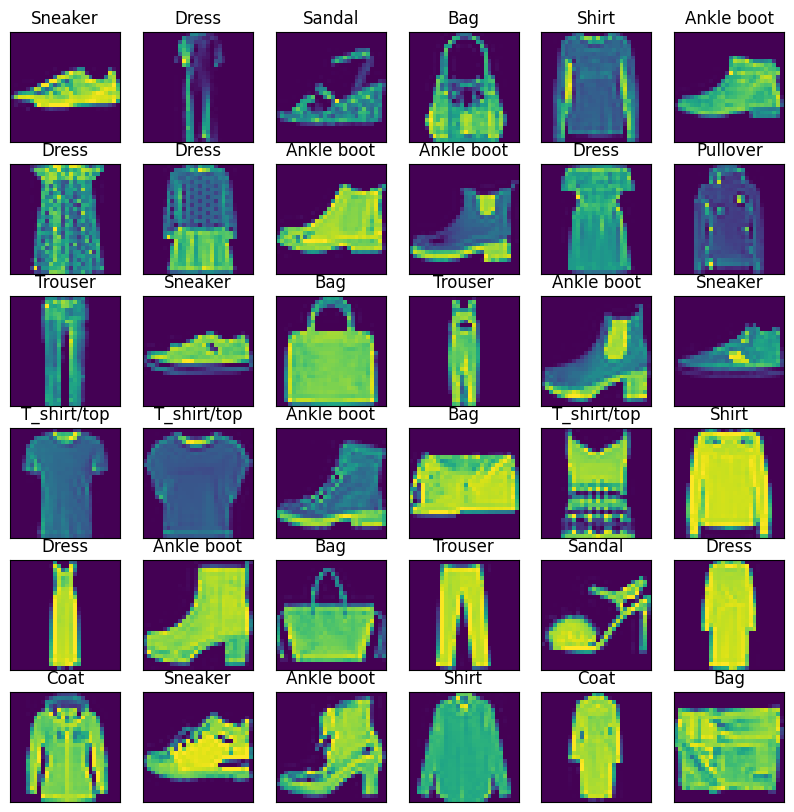

In [11]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# Model Architecture

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
from keras.optimizers import Adam

In [18]:
image_shape = x_train[0].shape

(28, 28, 1)

In [24]:
CNN = Sequential(name="Sequential_CNN")

# 1ST layer of CONV2D and maxpooling
CNN.add(Conv2D(128, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu", input_shape=image_shape))
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"))
# Dropout layer
# CNN.add(Dropout(0.2))


# 2ND layer of CONV2D and maxpooling
CNN.add(Conv2D(64, kernel_size=(3, 3),strides=(1, 1),padding="same",activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"))
# Dropout layer
# CNN.add(Dropout(0.2))

# 3rd layer of CONV2D and maxpooling
CNN.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1),padding="same",activation="relu"))
CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding="valid"))
# Dropout layer
# CNN.add(Dropout(0.2))

# FLATTEN layer
CNN.add(Flatten())


# Multiple dense layers
CNN.add(Dense(128, activation='relu'))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(10, activation='softmax')) #multiclass classification hence softmax activation function is used

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)      

# Model Compilation

In [25]:
CNN.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])
model = CNN.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=100,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/100
94/94 [==============================] - 4s 32ms/step - loss: 0.9141 - accuracy: 0.6689 - val_loss: 0.5642 - val_accuracy: 0.7943
Epoch 2/100
94/94 [==============================] - 2s 27ms/step - loss: 0.5004 - accuracy: 0.8207 - val_loss: 0.4381 - val_accuracy: 0.8431
Epoch 3/100
94/94 [==============================] - 2s 26ms/step - loss: 0.4178 - accuracy: 0.8511 - val_loss: 0.3826 - val_accuracy: 0.8651
Epoch 4/100
94/94 [==============================] - 2s 27ms/step - loss: 0.3699 - accuracy: 0.8685 - val_loss: 0.3494 - val_accuracy: 0.8758
Epoch 5/100
94/94 [==============================] - 2s 25ms/step - loss: 0.3501 - accuracy: 0.8734 - val_loss: 0.3445 - val_accuracy: 0.8763
Epoch 6/100
94/94 [==============================] - 3s 28ms/step - loss: 0.3243 - accuracy: 0.8823 - val_loss: 0.3198 - val_accuracy: 0.8823
Epoch 7/100
94/94 [==============================] - 3s 27ms/step - loss: 0.3052 - accuracy: 0.8889 - val_loss: 0.3140 - val_accuracy: 0.8832
Epoch 

# Train and Validation results

Text(0.5, 1.0, 'Train - Accuracy')

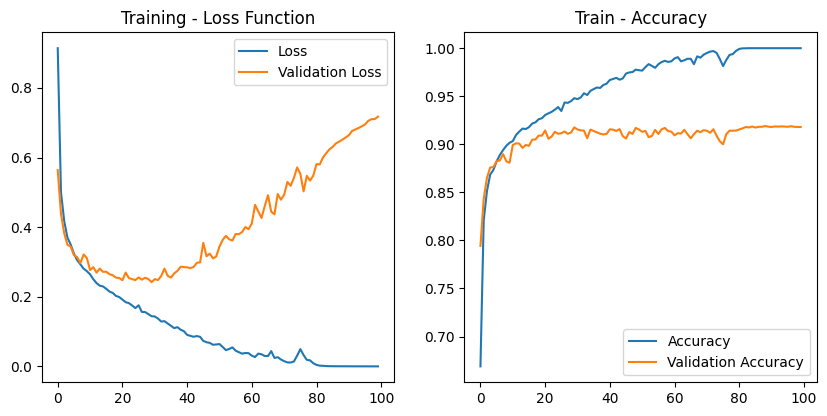

In [26]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model.history['loss'], label='Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(model.history['accuracy'], label='Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [29]:
x_test = test_images
y_test = test_labels

In [30]:
test_loss, test_accuracy = CNN.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.2f}'.format(test_loss) )
print('Test Accuracy : {:.2f}'.format(test_accuracy*100) + '%')

Test Loss : 0.76
Test Accuracy : 91.76%


In [33]:
predictions = CNN.predict(x_test)
predictions.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = np.argmax(predictions, axis=1)
y_true = y_test
cf_mtx = confusion_matrix(y_true, y_pred)
cf_mtx

array([[868,   0,  17,  16,   1,   2,  91,   0,   5,   0],
       [  2, 982,   1,   8,   4,   0,   1,   0,   2,   0],
       [ 21,   1, 864,   7,  49,   1,  53,   0,   4,   0],
       [ 12,   6,  16, 918,  25,   0,  22,   0,   1,   0],
       [  2,   0,  46,  19, 890,   0,  41,   0,   2,   0],
       [  0,   0,   0,   1,   0, 981,   0,  14,   0,   4],
       [ 96,   0,  58,  25,  55,   1, 762,   0,   3,   0],
       [  0,   0,   0,   0,   0,  10,   0, 973,   0,  17],
       [  6,   0,   0,   4,   3,   2,   5,   3, 977,   0],
       [  0,   0,   0,   0,   0,   9,   0,  29,   1, 961]])

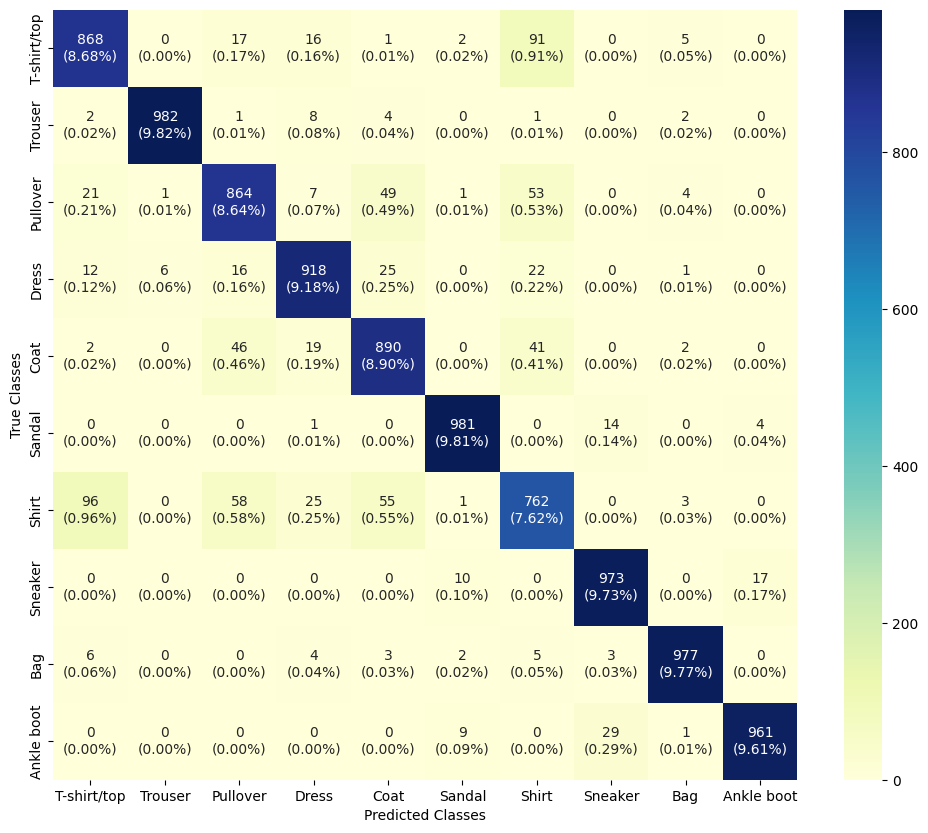

In [35]:
import seaborn as sns

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(10, 10)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [36]:
print(classification_report(y_test, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.87      0.89      0.88      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [38]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 10.8 MB/s eta 0:00:00


# Hyper Paramter Optimisation using RandomSearch

In [53]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [57]:
def build_model(hp):
    model = Sequential(
                        [
                        Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),activation=hp.Choice('Act_1', values = ['relu','LeakyReLU']),input_shape=(28,28,1),padding='same'),
                        MaxPooling2D(pool_size=(2,2),padding='valid'),
                        Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64,  step=16),kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),activation=hp.Choice('Act_2', values = ['relu','LeakyReLU']),padding='same'),
                        MaxPooling2D(pool_size=(2,2),padding='valid'),
                        Flatten(),
                        Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),activation='relu'),
                        Dense(10, activation='softmax')#o/p layer with 10 categories
                        ]
                      )
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [58]:
tuner_search=RandomSearch(
                          build_model,
                          objective='val_accuracy',
                          max_trials=5,
                          executions_per_trial=3,
                          directory='CNN',
                          project_name="Fashion Mnist"
                         )

In [59]:
tuner_search.search_space_summary()

Search space summary
Default search space size: 6
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
conv_1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv_2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001], 'ordered': True}


In [60]:
tuner_search.search(x_train,y_train,epochs = 5,validation_data = (x_val,y_val))

Trial 5 Complete [00h 01m 48s]
val_accuracy: 0.9136388699213663

Best val_accuracy So Far: 0.91866668065389
Total elapsed time: 00h 07m 37s


In [61]:
tuner_search.results_summary()

Results summary
Results in CNN/Fashion Mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 128
learning_rate: 0.001
Act_1: relu
Act_2: relu
Score: 0.91866668065389

Trial 4 summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.001
Act_1: LeakyReLU
Act_2: LeakyReLU
Score: 0.9136388699213663

Trial 0 summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.001
Score: 0.910777767499288

Trial 2 summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 3
dense_1_units: 64
learning_rate: 0.01
Act_1: relu
Act_2: LeakyReLU
Score: 0.8814166585604349

Trial 3 summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 32
conv_2_kernel: 3
dense_1_units: 128

In [70]:
best_model = tuner_search.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 112)       1120      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 112)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        64576     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [71]:
model_2=best_model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=100,
    verbose=1,
    validation_data=(x_val,y_val),
)


Epoch 1/100
94/94 [==============================] - 4s 30ms/step - loss: 0.1281 - accuracy: 0.9525 - val_loss: 0.2000 - val_accuracy: 0.9278
Epoch 2/100
94/94 [==============================] - 2s 24ms/step - loss: 0.1125 - accuracy: 0.9594 - val_loss: 0.1990 - val_accuracy: 0.9288
Epoch 3/100
94/94 [==============================] - 2s 25ms/step - loss: 0.1055 - accuracy: 0.9623 - val_loss: 0.2006 - val_accuracy: 0.9265
Epoch 4/100
94/94 [==============================] - 2s 23ms/step - loss: 0.1003 - accuracy: 0.9645 - val_loss: 0.2006 - val_accuracy: 0.9278
Epoch 5/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0944 - accuracy: 0.9669 - val_loss: 0.2009 - val_accuracy: 0.9288
Epoch 6/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0908 - accuracy: 0.9677 - val_loss: 0.2041 - val_accuracy: 0.9295
Epoch 7/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0856 - accuracy: 0.9695 - val_loss: 0.2040 - val_accuracy: 0.9293
Epoch 

In [72]:
test_loss, test_accuracy = best_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.2f}'.format(test_loss) )
print('Test Accuracy : {:.2f}'.format(test_accuracy*100) + '%')

Test Loss : 0.82
Test Accuracy : 92.26%


# Summary

We have seen how to import the sample datasets
and build a CNN image classifier
Using a CNN model and also fine tune it with Hyper parameter Optimisation using Random Search CV